# Éléments de trading algorithmique en Python

* [Librairies](#librairies)
* [Les data frames Pandas](#data_frames)
* [Quelques Analyses Financières](#analyses)
    - [Prix](#prix)
    - [Rendements](#rendements)
    - [Volatilité](#volatilité)
    - [Moyennes mobiles (rolling means) et chandeliers (candlesticks)](#moyennes_chandeliers)
* [Une strtégie de trading simple](#trading_strategy)
* [Backtesting de la stratégie](#backtesting)
* [Évaluation de la stratégie](#evaluation)
    - [Sharpe Ratio](#Sharpe)
    - [Maximum Drawdown](#Maximum_Drawdown)
    - [Compound Annual Growth Rate](#CAGR)

<a id='librairies'></a>
## Librairies
1. La librairie `pandas` contient des fonctions indispnsables pour l'analyse de données: https://pandas.pydata.org/pandas-docs/stable/
2. La librairie `numpy` contient des fonctions indispnsables pour le calcul scientifique: https://www.numpy.org/devdocs/
3. La librairie `matplotlib` contient des fonctions indispnsables pour le graphisme scientifique: https://matplotlib.org/3.1.1/index.html
4. La librairie `quandl` qui permet d'aller chercher les données financières sur le site **Quandl**: https://www.quandl.com/ <br>
Doc for Python: https://www.quandl.com/tools/python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import quandl
quandl.ApiConfig.api_key = "oqdC7trBsW7Y_craH2JG"
# quandl authentification session: I have a free Quandl account with API key: oqdC7trBsW7Y_craH2JG

In [4]:
# on charge les valeurs de l'action Apple Inc (AAPL) (quandl.get)
aapl = quandl.get("WIKI/AAPL", start_date = "2012-01-01", end_date = "2018-03-27")
aapl.tail() # affiche le début des données

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [5]:
# Si les données sont dans un fichier csv, on peut les charger comme suit:
# (le nom du fichier est donné en paramètre)
aapl2 = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header = 0, index_col = 0, names = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates = True)
aapl2.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


<a id='data_frames'></a>
## Les data frames Pandas

In [6]:
# 'columns' retourne les colonnes du data frame
print(aapl.columns)

# 'index' retourne les lignes du data frame
print(aapl.index)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')
DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1566, freq=None)


In [7]:
# 1. Selection de colonnes via leurs noms (loc)

# (a) une colonne
close = aapl.loc[:, "Close"] # colonne 'Close'
print(close.head())
# une seule colonnes est de type 'série temporelle' (pandas.core.series.Series)
type(close)

# (b) plusieurs colonnes
open_close = aapl.loc[:, ["Open" , "Close"]] # colonnes 'Open' et 'Close'
print(open_close.head())
# on voit que ces données sont de type 'série temporelle' (pandas.core.series.Series)
type(open_close)

Date
2012-01-03    411.23
2012-01-04    413.44
2012-01-05    418.03
2012-01-06    422.40
2012-01-09    421.73
Name: Close, dtype: float64
                Open   Close
Date                        
2012-01-03  409.4000  411.23
2012-01-04  410.0000  413.44
2012-01-05  414.9500  418.03
2012-01-06  419.7700  422.40
2012-01-09  425.5001  421.73


pandas.core.frame.DataFrame

In [8]:
# 2. Selection de lignes via leurs noms (loc)

# (a) une ligne
my_row = aapl.loc[[pd.Timestamp("2012-01-09")], :] # convertit string en date
print(my_row)

# (b) plusieurs lignes
my_rows = aapl.loc[[pd.Timestamp("2012-01-09"),
                   pd.Timestamp("2013-01-09"),
                   pd.Timestamp("2014-01-09")], :] # convertit string en date ("Y" majuscule!)
print(my_rows)

                Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                    
2012-01-09  425.5001  427.75  421.35  421.73  14072300.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2012-01-09          1.0  54.682693  54.971837  54.149348   54.198183   

            Adj. Volume  
Date                     
2012-01-09   98506100.0  
                Open      High       Low    Close      Volume  Ex-Dividend  \
Date                                                                         
2012-01-09  425.5001  427.7500  421.3500  421.730  14072300.0          0.0   
2013-01-09  522.5000  525.0054  515.9900  517.100  14557300.0          0.0   
2014-01-09  546.8000  546.8600  535.3501  536.519   9969600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                  

In [9]:
# 3. Selection d'élément via leurs noms de ligne et colonne (loc)

my_element = aapl.loc[pd.Timestamp("2014-01-09"), "Volume"]
print(my_element)

9969600.0


In [10]:
# 4. Selection de colonnes via leurs indices (iloc)

# (a) une colonne
high = aapl.iloc[:, 1] # colonne 'High'
print(high.head())

# (b) plusieurs colonnes
high_low = aapl.iloc[:, [1,2,4]] # colonnes 'High', 'Low', "Volume"
print(high_low.head())

Date
2012-01-03    412.50
2012-01-04    414.68
2012-01-05    418.55
2012-01-06    422.75
2012-01-09    427.75
Name: High, dtype: float64
              High     Low      Volume
Date                                  
2012-01-03  412.50  409.00  10793600.0
2012-01-04  414.68  409.28   9286500.0
2012-01-05  418.55  412.67   9688200.0
2012-01-06  422.75  419.22  11367600.0
2012-01-09  427.75  421.35  14072300.0


In [11]:
# 5. Selection de lignes via leurs indices (iloc)

# (a) une ligne
my_row = aapl.iloc[1, :] # 1ère ligne (représentée en colonne)
print(my_row)

# (b) plusieurs lignes
my_rows = aapl.iloc[[1,2,100], :] # lignes 1, 2, 100
print(my_rows)

Open           4.100000e+02
High           4.146800e+02
Low            4.092800e+02
Close          4.134400e+02
Volume         9.286500e+06
Ex-Dividend    0.000000e+00
Split Ratio    1.000000e+00
Adj. Open      5.269071e+01
Adj. High      5.329216e+01
Adj. Low       5.259818e+01
Adj. Close     5.313280e+01
Adj. Volume    6.500550e+07
Name: 2012-01-04 00:00:00, dtype: float64
              Open    High      Low   Close      Volume  Ex-Dividend  \
Date                                                                   
2012-01-04  410.00  414.68  409.280  413.44   9286500.0          0.0   
2012-01-05  414.95  418.55  412.670  418.03   9688200.0          0.0   
2012-05-25  564.59  565.85  558.472  562.29  11732400.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2012-01-04          1.0  52.690714  53.292160  52.598184   53.132802   
2012-01-05          1.0  53.326858  53.789509

In [12]:
# 6. Selection d'élément via leurs indices de ligne et colonne (iloc)

my_element = aapl.iloc[247, 3] # 247-ème ligne et 3-ème colonne
print(my_element)

515.06


In [13]:
# Exemple:
# colonnes 'Open' et 'Close' de la période novembre-décembre 2015
print( aapl.loc[pd.Timestamp("2015-11-01"):pd.Timestamp("2015-12-31"), ["Open","Close"]] )

              Open    Close
Date                       
2015-11-02  119.87  121.180
2015-11-03  120.79  122.570
2015-11-04  123.13  122.000
2015-11-05  121.85  120.920
2015-11-06  121.11  121.060
2015-11-09  120.96  120.570
2015-11-10  116.90  116.770
2015-11-11  116.37  116.110
2015-11-12  116.26  115.720
2015-11-13  115.20  112.340
2015-11-16  111.38  114.175
2015-11-17  114.92  113.690
2015-11-18  115.76  117.290
2015-11-19  117.64  118.780
2015-11-20  119.20  119.300
2015-11-23  119.27  117.750
2015-11-24  117.33  118.880
2015-11-25  119.21  118.030
2015-11-27  118.29  117.810
2015-11-30  117.99  118.300
2015-12-01  118.75  117.340
2015-12-02  117.05  116.280
2015-12-03  116.55  115.200
2015-12-04  115.29  119.030
2015-12-07  118.98  118.280
2015-12-08  117.52  118.230
2015-12-09  117.64  115.620
2015-12-10  116.04  116.170
2015-12-11  115.19  113.180
2015-12-14  112.18  112.480
2015-12-15  111.94  110.490
2015-12-16  111.07  111.340
2015-12-17  112.02  108.980
2015-12-18  108.91  

In [14]:
# 7. Ajout et suppression d'une colonne 

# ajout d'une colonne 'diff'
aapl['diff'] = aapl.Open - aapl.Close
print(aapl.columns)

# suppression de 'diff'
del aapl['diff']
print(aapl.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'diff'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


<a id='analyses'></a>
## Quelques Analyses Financières

<a id='prix'></a>
### Prix

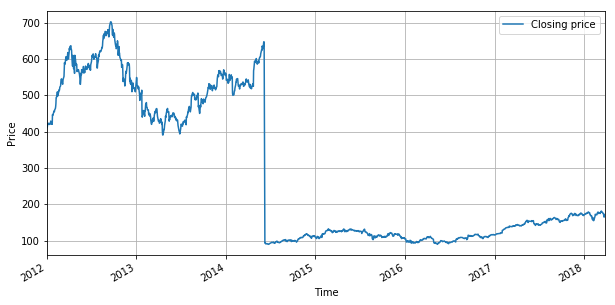

In [15]:
# Graphe des prix (d'ouverture et) de clotûres de Apple Inc.
# À comparer avec le graphe sur le site Quandl: https://www.quandl.com/
#aapl['Open'].plot(grid = True, label = "Opening price", figsize = (10,5))
aapl["Close"].plot(grid = True, label = "Closing price", figsize = (10,5))
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show() # imprime le graphe

<a id='rendements'></a>
### Rendements

In [16]:
# Récupération de la colonne "Adj. Close", qui représente les "adjusted closing prices".
daily_close = aapl[['Adj. Close']]

# Calcul des rendements journaliers ("daily returns")
# la fonction "pct_change" donne les pourcentages de changement entre les éléments successifs de la série.
# elle effectue les opérations: s[i] = s[i]/(s[i+1] - 1)
daily_returns = daily_close.pct_change()                    # built-in method
daily_returns_test = daily_close / daily_close.shift(1) - 1 # notre calcul
print(daily_returns_test == daily_returns_test) # les 1er éléments NaN sont incomparables

# Chercher s'il y a des valeurs non-disponibles (NA values)
print(daily_returns.isna().sum())
# Remplacer les valeurs NA (non-available) par 0
daily_returns.fillna(0, inplace = True)
print(daily_returns.isna().sum())

# Inspection rapide des "daily returns"
print(daily_returns.head())

# Calcul des "daily log returns": log(daily_returns + 1)
#daily_log_returns = np.log(daily_returns + 1)
#print(daily_log_returns)

            Adj. Close
Date                  
2012-01-03       False
2012-01-04        True
2012-01-05        True
2012-01-06        True
2012-01-09        True
...                ...
2018-03-21        True
2018-03-22        True
2018-03-23        True
2018-03-26        True
2018-03-27        True

[1566 rows x 1 columns]
Adj. Close    1
dtype: int64
Adj. Close    0
dtype: int64
            Adj. Close
Date                  
2012-01-03    0.000000
2012-01-04    0.005374
2012-01-05    0.011102
2012-01-06    0.010454
2012-01-09   -0.001586


In [17]:
# Statistiques des "daily returns" (describe)
print(daily_returns.describe())

        Adj. Close
count  1566.000000
mean      0.000864
std       0.015726
min      -0.123549
25%      -0.006669
50%       0.000435
75%       0.009161
max       0.088741


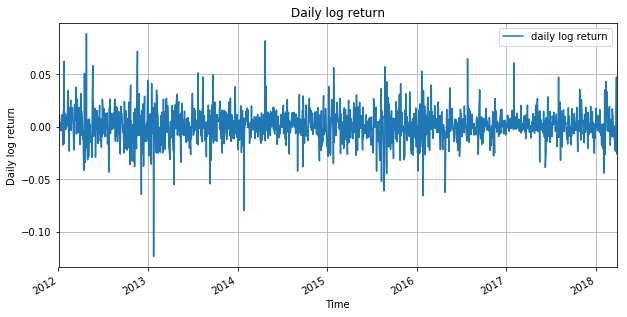

In [18]:
# Graphe des "daily returns" (plot)
daily_returns["Adj. Close"].plot(label = "daily log return", grid = True, figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Daily log return")
plt.title("Daily log return")
plt.legend()
plt.show()
# le graphe est difficile à interpréter; en général, on se focalise sur les *cummulative returns*.

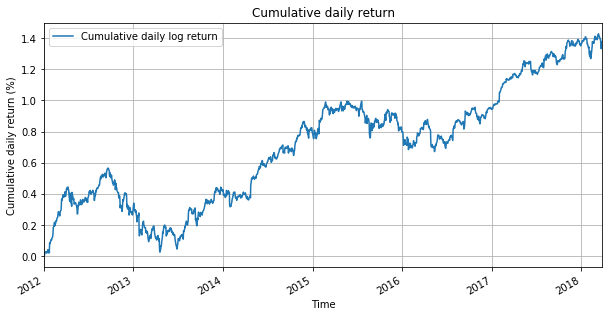

In [19]:
# Calcul et graphe des "cummulative daily returns" (plot)

# "cumulative daily log returns" (cumsum)
cum_daily_returns = daily_returns.cumsum()
cum_daily_returns.head()

# Graphe des "cumulative daily returns" (plot)
cum_daily_returns["Adj. Close"].plot(grid = True, label = "Cumulative daily log return", figsize = (10,5))
plt.xlabel("Time")
plt.ylabel("Cumulative daily return (%)")
plt.title("Cumulative daily return")
plt.legend(loc = "upper left")
plt.show()

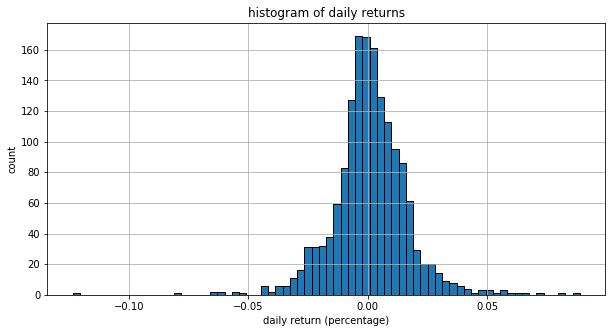

In [20]:
# Distribution des "daily returns" (hist)
daily_returns.hist(bins = 70, edgecolor = "black", figsize = (10,5))
plt.xlabel("daily return (percentage)")
plt.ylabel("count")
plt.title("histogram of daily returns")
plt.show()

In [21]:
# Pour diminuer le nombre de valeurs, nous pouvons nous focaliser sur des tranches temporelles plus grandes,
# comme les mois, les mois ouvrables ou les années (au lieu des jours).
# Utiliser la méthode "resample" et applquer une méthode pour séléectionner les données (cf. doc).

# Calcul de 2 types de "monthly returns"

# 1. Réduire le data frame en valeurs mensuelles (resample)
# en sélectionnant les valeurs moyennes (mean) de chaque mois (month "M")
aapl_monthly_1 = aapl.resample("M").mean()
print(aapl_monthly_1.shape) # il y a 75 mois (au lieu de milliers de jours)
monthly_close_1 = aapl_monthly_1[['Adj. Close']]

# Calcul des "monthly returns" (pct_change)
monthly_returns_1 = monthly_close_1.pct_change()
# Calcul des "cummulative monthly returns" (cumsum)
cum_monthly_returns_1 = monthly_returns_1.cumsum()
cum_monthly_returns_1.fillna(0, inplace = True)

# 1. Réduire le data frame en valeurs mensuelles (resample)
# en sélectionnant les dernières valeurs (lambda fct) de chaque mois (month "M")
aapl_monthly_2 = aapl.resample("M").apply(lambda x: x[-1])
print(aapl_monthly_2.shape) # il y a 75 mois (au lieu de milliers de jours)
monthly_close_2 = aapl_monthly_2[["Adj. Close"]]

# Calcul des "monthly returns" (pct_change)
monthly_returns_2 = monthly_close_2.pct_change()
# Calcul des "cummulative monthly returns" (cumsum)
cum_monthly_returns_2 = monthly_returns_2.cumsum()
cum_monthly_returns_2.fillna(0, inplace = True)

(75, 12)
(75, 12)


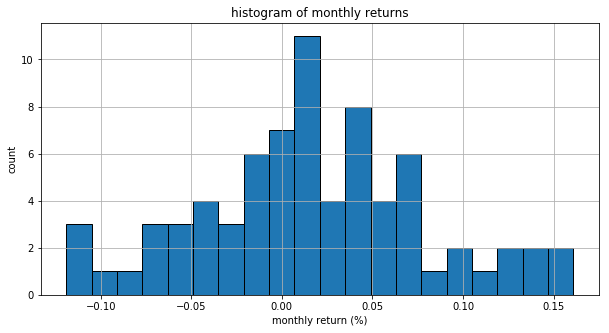

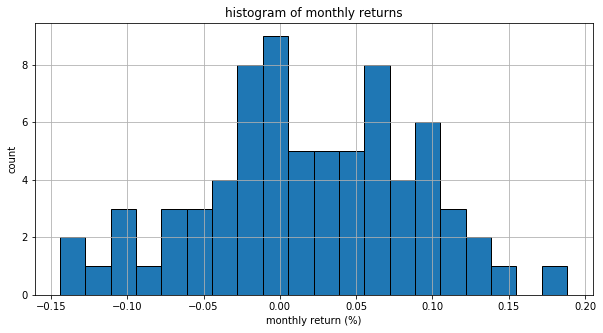

In [22]:
# Distribution des "monthly returns" (hist)
monthly_returns_1["Adj. Close"].hist(bins = 20, edgecolor = "black", figsize = (10,5))
plt.xlabel("monthly return (%)")
plt.ylabel("count")
plt.title("histogram of monthly returns")
plt.show()

monthly_returns_2["Adj. Close"].hist(bins = 20, edgecolor = "black", figsize = (10,5))
plt.xlabel("monthly return (%)")
plt.ylabel("count")
plt.title("histogram of monthly returns")
plt.show()

/Users/jeremie.cabessau-paris2.fr/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


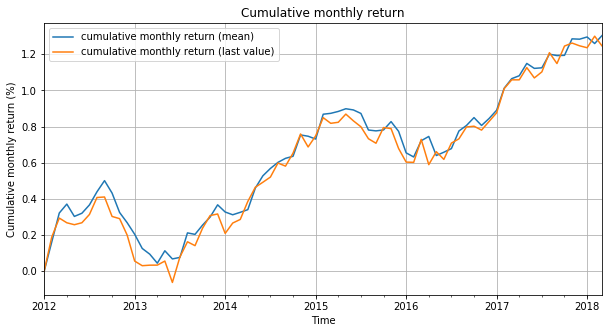

In [23]:
# Graphe des "cumulative monthly returns" (plot)
cum_monthly_returns_1["Adj. Close"].plot(grid = True, label = "cumulative monthly return (mean)", figsize = (10,5))
cum_monthly_returns_2["Adj. Close"].plot(grid = True, label = "cumulative monthly return (last value)", figsize = (10,5))
plt.xlabel("Time")
plt.ylabel("Cumulative monthly return (%)")
plt.title("Cumulative monthly return")
plt.legend(loc = "upper left")
plt.show()

<a id='volatilité'></a>
### Volatilité

In [24]:
# Volatilité (rolling(min_periods).std() * np.sqrt(min_periods))
min_periods = 75 # nombre de périodes minimum considéré
aapl_vol = daily_returns.rolling(min_periods).std() * np.sqrt(min_periods) 
#print(aapl_vol.tail())

# on renomme la colonne de ce data frame
aapl_vol = aapl_vol.rename(columns = {"Adj. Close" : "Volatility"}) # renommage
aapl_vol.tail()

,Volatility
Date,
2018-03-21,0.121652
2018-03-22,0.122394
2018-03-23,0.124348
2018-03-26,0.133199
2018-03-27,0.135661


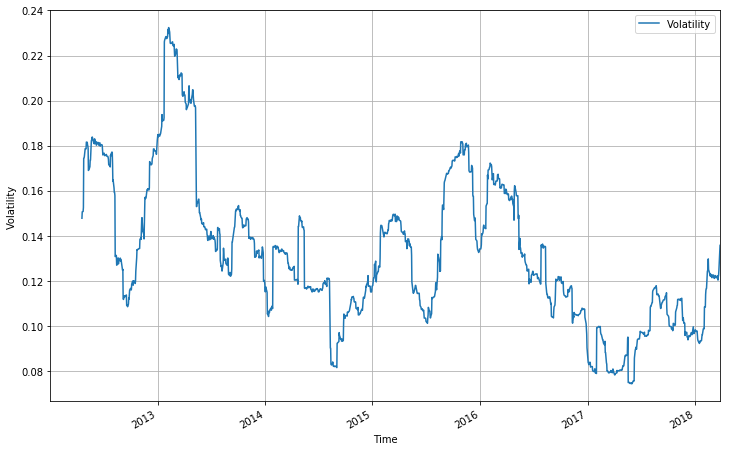

In [25]:
# graphe des volatilités
aapl_vol.plot(grid = True, label = "Volatility", figsize = (12, 8))
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

<a id='moyennes_chandeliers'></a>
### Moyennes mobiles (rolling means) et chandeliers (candlesticks)

In [26]:
# autres librairies
from mpl_finance import candlestick_ohlc
import pandas_datareader as web
import matplotlib.dates as mdates

In [27]:
# Cette fois, on load les data depuis yahoo finance (via pandas_datareader)
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2010,5,31)
#end = datetime.datetime.now()

aapl_yahoo = web.DataReader('AAPL', 'yahoo', start, end)
aapl_yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700,26.428249


In [28]:
# On récupère les "adjusted closing prices"
adj_close = aapl_yahoo["Adj Close"]

# on rajoute 2 colonnes: moyennes mobiles sur 7 et 30 jours
# on utlise la fonction rolling(window = k).mean()
aapl_yahoo["rolling means - 7 days"] = adj_close.rolling(window = 7).mean()
aapl_yahoo["rolling means - 30 days"] = adj_close.rolling(window = 30).mean()

# si on inspecte aapl_yahoo.head(), on remarque que les moyennes ne commencent pas tout de suite
aapl_yahoo.tail()

,High,Low,Open,Close,Volume,Adj Close,rolling means - 7 days,rolling means - 30 days
Date,,,,,,,,
2010-05-24,35.842857,35.180000,35.325714,35.251427,188559700,30.764381,30.911503,31.688467
2010-05-25,35.251427,33.880001,34.192856,35.031429,262001600,30.572392,30.758333,31.700061
2010-05-26,36.018570,34.821430,35.725716,34.872856,212663500,30.433996,30.578267,31.693495
2010-05-27,36.270000,35.587143,35.799999,36.192856,166570600,31.585985,30.595898,31.711905
2010-05-28,37.057144,36.192856,37.055714,36.697144,203903700,32.026073,30.747999,31.751301


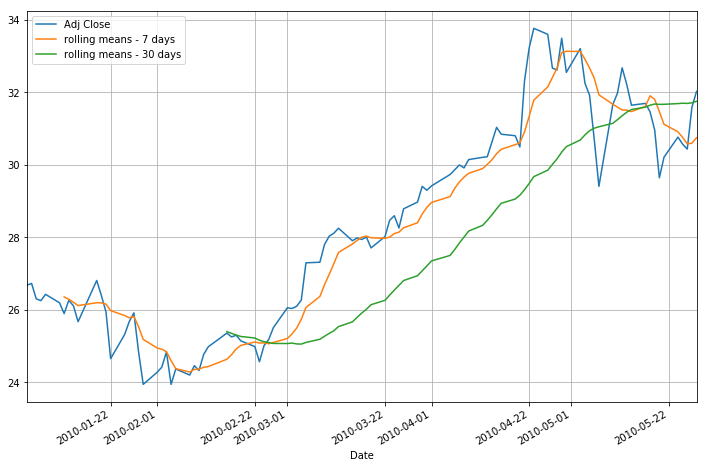

In [29]:
# graphe
aapl_yahoo[["Adj Close", "rolling means - 7 days", "rolling means - 30 days"]].plot(grid = True, figsize = (12, 8))
plt.show()

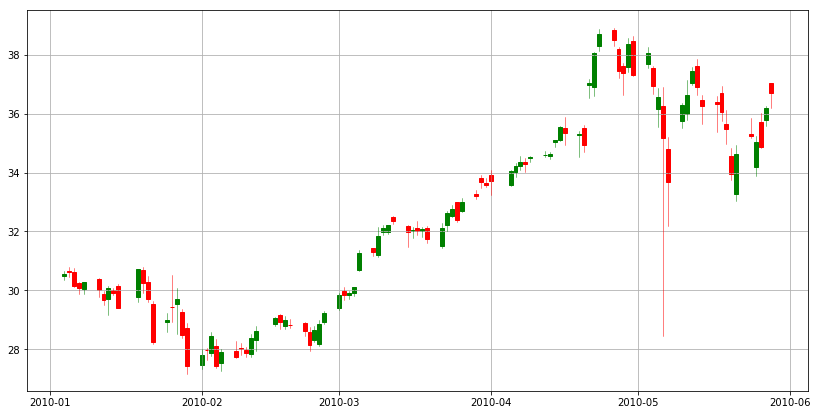

In [30]:
# Pour les candlesttick, on sélectionne les 4 colonnes qui nous intéressent
aapl_yahoo2 = aapl_yahoo.loc[:, ["Open", "High", "Low", "Close"]]

#print(aapl_yahoo2.head())
# Set indices
aapl_yahoo2.reset_index(inplace = True)
#print(aapl_yahoo2.head())
# convert the "Date" column into float
aapl_yahoo2["Date"] = aapl_yahoo2["Date"].map(mdates.date2num)
#print(aapl_yahoo2.head())

# Plot the candlestick chart 
fig, ax = plt.subplots(figsize = (14, 7))
candlestick_ohlc(ax, aapl_yahoo2.values, width = 0.8, colorup = "g", colordown = "r")
ax.xaxis_date() # put dates on x-axis
ax.grid(True)   # turn on grid
plt.show()      # show plot

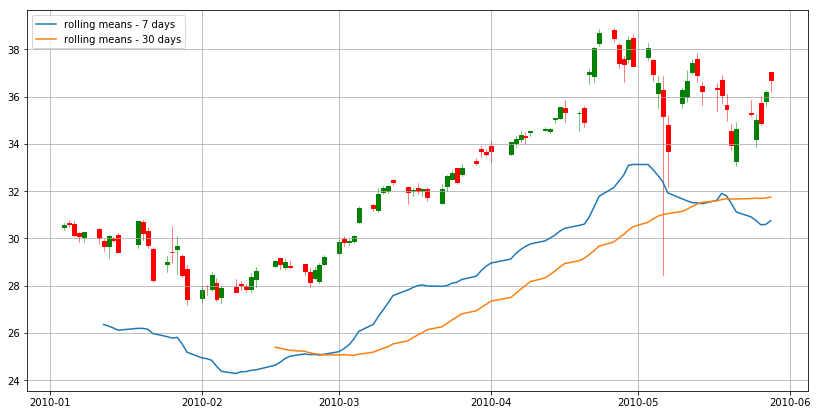

In [31]:
# On groupe rolling means et candlesticks...
fig, ax = plt.subplots(figsize = (14, 7))
candlestick_ohlc(ax, aapl_yahoo2.values, width = 0.8, colorup = "g", colordown = "r")
ax.plot(aapl_yahoo["rolling means - 7 days"], label = "rolling means - 7 days") # moyenne moblie 7 jours
ax.plot(aapl_yahoo["rolling means - 30 days"], label = "rolling means - 30 days") # moyenne moblie 30 jours
ax.xaxis_date() # put dates on x-axis
ax.grid(True)   # turn on grid
plt.legend()    # show plot
plt.show()      # show plot

<a id='plusieurs_actions'></a>
### Cas de plusieurs actions

In [32]:
# On load plusieurs actions depuis le site Quandl: 
GAFA = ["WIKI/GOOGL", "WIKI/AMZN", "WIKI/FB", "WIKI/AAPL"] # liste des 4 tickets of the GAFA
gafa = quandl.get(GAFA, start_date = "2012-01-01")

In [33]:
gafa.head()
print(gafa.columns)

Index(['WIKI/GOOGL - Open', 'WIKI/GOOGL - High', 'WIKI/GOOGL - Low',
       'WIKI/GOOGL - Close', 'WIKI/GOOGL - Volume', 'WIKI/GOOGL - Ex-Dividend',
       'WIKI/GOOGL - Split Ratio', 'WIKI/GOOGL - Adj. Open',
       'WIKI/GOOGL - Adj. High', 'WIKI/GOOGL - Adj. Low',
       'WIKI/GOOGL - Adj. Close', 'WIKI/GOOGL - Adj. Volume',
       'WIKI/AMZN - Open', 'WIKI/AMZN - High', 'WIKI/AMZN - Low',
       'WIKI/AMZN - Close', 'WIKI/AMZN - Volume', 'WIKI/AMZN - Ex-Dividend',
       'WIKI/AMZN - Split Ratio', 'WIKI/AMZN - Adj. Open',
       'WIKI/AMZN - Adj. High', 'WIKI/AMZN - Adj. Low',
       'WIKI/AMZN - Adj. Close', 'WIKI/AMZN - Adj. Volume', 'WIKI/FB - Open',
       'WIKI/FB - High', 'WIKI/FB - Low', 'WIKI/FB - Close',
       'WIKI/FB - Volume', 'WIKI/FB - Ex-Dividend', 'WIKI/FB - Split Ratio',
       'WIKI/FB - Adj. Open', 'WIKI/FB - Adj. High', 'WIKI/FB - Adj. Low',
       'WIKI/FB - Adj. Close', 'WIKI/FB - Adj. Volume', 'WIKI/AAPL - Open',
       'WIKI/AAPL - High', 'WIKI/AAPL - Low',

In [34]:
# On peut charger un fichier csv
#all_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])

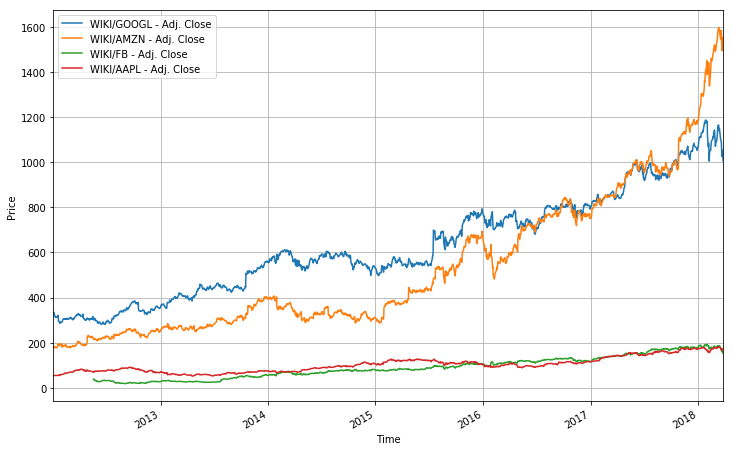

In [35]:
# prix de clotûre
daily_close_gafa = gafa.loc[:, ["WIKI/GOOGL - Adj. Close",
                               "WIKI/AMZN - Adj. Close",
                               "WIKI/FB - Adj. Close",
                               "WIKI/AAPL - Adj. Close"]]

# prix
daily_close_gafa.plot(grid = True, label = "Closing price", figsize = (12, 8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [36]:
# Rendements journaliers ("daily returns") (pct_change)
daily_returns_gafa = daily_close_gafa.pct_change()
#daily_returns_gafa.head()

# on renomme les colonnes de ce data frame
# (a bit intricate, but powerful, python syntax
# (a) on crée les nouveaux noms de colonnes à partir de daily_returns_gafa.columns
new_col_name = list( map(lambda l : l[:-10] + "daily return", daily_returns_gafa.columns) )
# (b) on crée le dico  { anciens noms : nouveaux noms }
dico_names = dict(zip(daily_returns_gafa.columns, new_col_name))
print(dico_names)
# (c) on renomme les anciennes colonnes
daily_returns_gafa = daily_returns_gafa.rename(columns = dico_names) # renommage
daily_returns_gafa.head()

{'WIKI/GOOGL - Adj. Close': 'WIKI/GOOGL - daily return', 'WIKI/AMZN - Adj. Close': 'WIKI/AMZN - daily return', 'WIKI/FB - Adj. Close': 'WIKI/FB - daily return', 'WIKI/AAPL - Adj. Close': 'WIKI/AAPL - daily return'}


,WIKI/GOOGL - daily return,WIKI/AMZN - daily return,WIKI/FB - daily return,WIKI/AAPL - daily return
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.004313,-0.008490,NaN,0.005374
2012-01-05,-0.013871,0.000563,NaN,0.011102
2012-01-06,-0.013642,0.028152,NaN,0.010454
2012-01-09,-0.042399,-0.022178,NaN,-0.001586


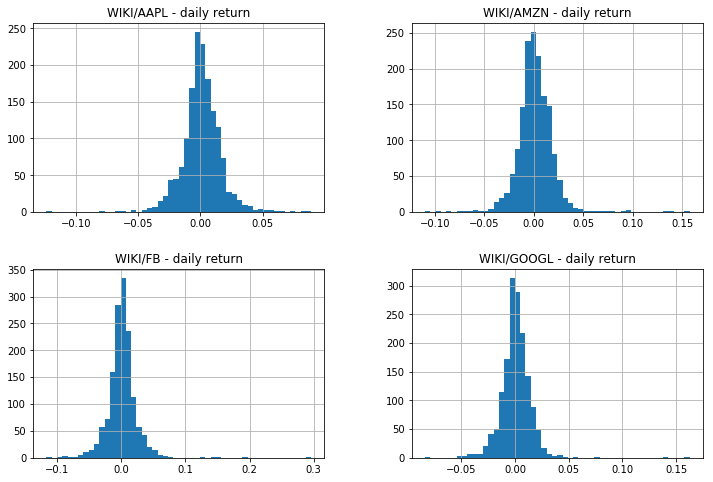

In [37]:
# histograommes des rendements journaliers
daily_returns_gafa.hist(bins = 50, sharex = False, figsize = (12,8))
plt.show()

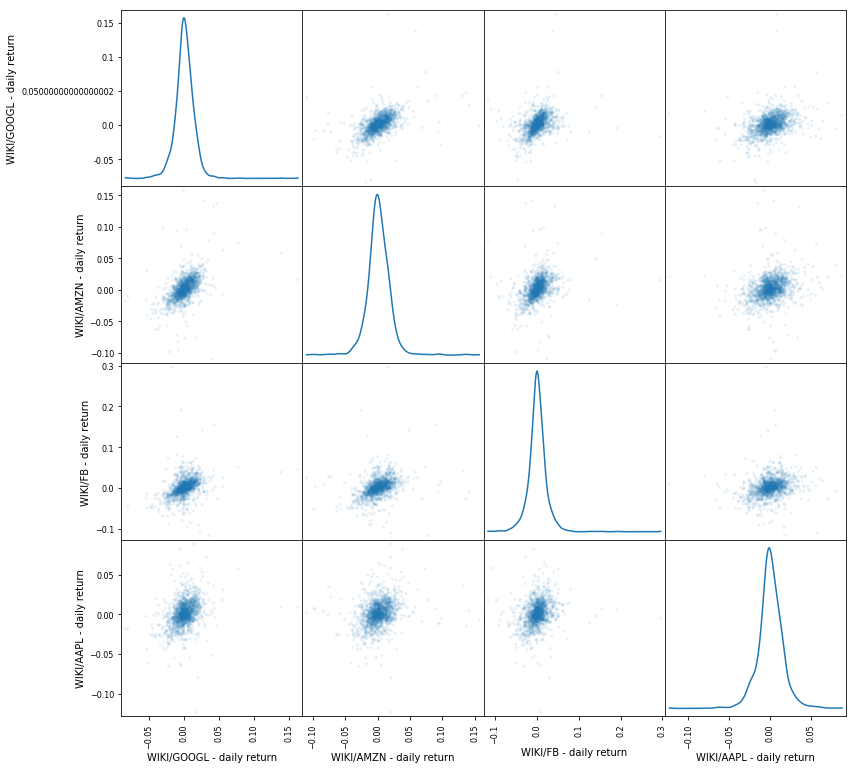

In [38]:
# Scatter matrix des rendements journaliers
pd.plotting.scatter_matrix(daily_returns_gafa, diagonal = "kde", alpha = 0.1, figsize = (13,13))
# KDE is a non-parametric way to estimate the probability density function of any variable we wish to view.
plt.show()

In [39]:
# Rendements journaliers cummulés
cum_daily_returns_gafa = daily_returns_gafa.cumsum()
cum_daily_returns_gafa.fillna(0, inplace = True)
cum_daily_returns_gafa.head()

,WIKI/GOOGL - daily return,WIKI/AMZN - daily return,WIKI/FB - daily return,WIKI/AAPL - daily return
Date,,,,
2012-01-03,0.000000,0.000000,0.0,0.000000
2012-01-04,0.004313,-0.008490,0.0,0.005374
2012-01-05,-0.009558,-0.007927,0.0,0.016476
2012-01-06,-0.023200,0.020225,0.0,0.026930
2012-01-09,-0.065599,-0.001954,0.0,0.025344


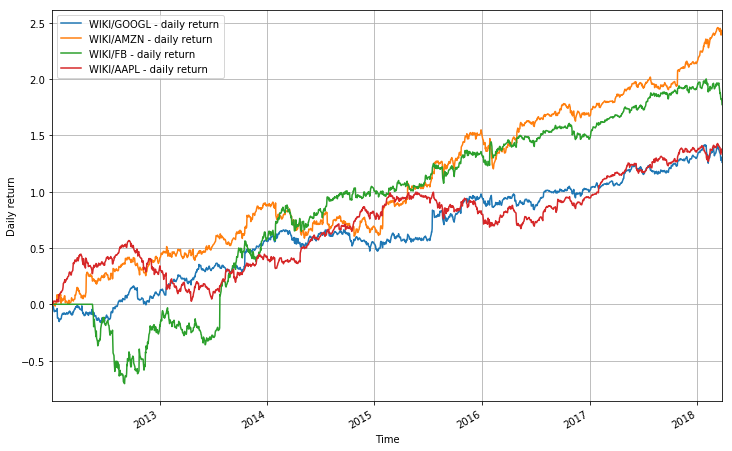

In [40]:
# graphes
cum_daily_returns_gafa.plot(grid = True, figsize = (12, 8))
plt.xlabel("Time")
plt.ylabel("Daily return")
plt.legend()
plt.show()

In [41]:
# Volatilité (rolling(min_periods).std() * np.sqrt(min_periods))
min_periods = 75 # nombre de périodes minimum considéré
vol_gafa = daily_returns_gafa.rolling(min_periods).std() * np.sqrt(min_periods) 
#print(vol_gafa.tail())

# on renomme les colonnes de ce data frame
# (a) on crée les nouveaux noms de colonnes à partir de daily_returns_gafa.columns
new_col_name = list( map(lambda l : l[:-12] + "volatility", daily_returns_gafa.columns) )
# (b) on crée le dico  { anciens noms : nouveaux noms }
dico_names = dict(zip(daily_returns_gafa.columns, new_col_name))
# (c) on renomme les anciennes colonnes
vol_gafa = vol_gafa.rename(columns = dico_names) # renommage
vol_gafa.tail()

,WIKI/GOOGL - volatility,WIKI/AMZN - volatility,WIKI/FB - volatility,WIKI/AAPL - volatility
Date,,,,
2018-03-21,0.136480,0.129878,0.159819,0.121652
2018-03-22,0.141279,0.131863,0.161561,0.122394
2018-03-23,0.142999,0.133564,0.163633,0.124348
2018-03-26,0.145262,0.138442,0.163474,0.133199
2018-03-27,0.151607,0.144575,0.169238,0.135661


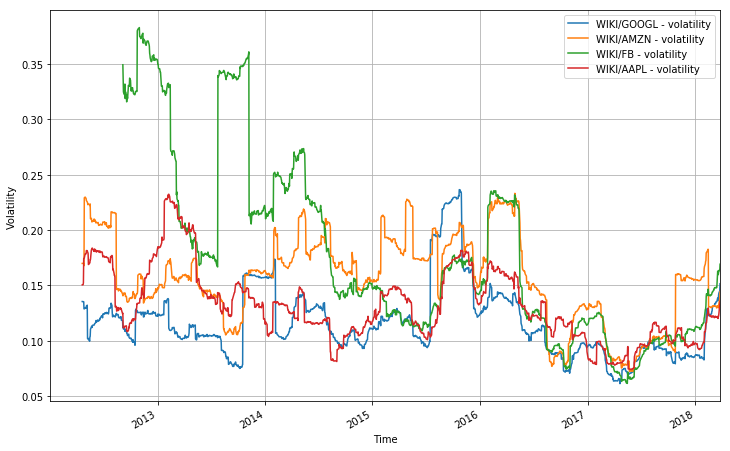

In [42]:
# graphe des volatilités
vol_gafa.plot(grid = True, label = "Volatility", figsize = (12, 8))
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

<a id='trading_strategy'></a>
## Une strategie de trading simple 

In [211]:
# On load les data depuis yahoo finance (via pandas_datareader)
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2014,12,31)
#end = datetime.datetime.now()

aapl_yahoo = web.DataReader("AAPL", "yahoo", start, end)
aapl_yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


In [218]:
# short and long windows
short_window = 30
long_window = 100

# (a) On initialise un dataFrame 'signals' avec une colonne 'signal'
signals = pd.DataFrame(index = aapl_yahoo.index)
signals["signal"] = 0.0 # on initialise la colonne signal à 0

#print(signals.head())

# (b) On crée une moyenne mobile sur la 'short window' (rolling().mean())
signals["short_mavg"] = aapl_yahoo["Close"].rolling(window = short_window, min_periods = 1, center = False).mean()
# parameters:
# window: size of the moving window
# min_periods: minimum number of observations in window required to have a value
# center: set the labels at the center of the window or not.

# (c) On crée une moyenne mobile sur la 'long window'
signals["long_mavg"] = aapl_yahoo["Close"].rolling(window = long_window, min_periods = 1, center=False).mean()

#print(signals.head())

# (d) On crée les signaux de trading: on update le data frame 'signals':
# on cosidére le data frame signals à partir des lignes no short_window -> fin
# lignes où moyenne 'short_window' > moyenne 'long_window' -> 1.0 dans la colonne 'signal'
# lignes où moyenne 'short_window' ≤ moyenne 'long_window' -> 0.0 dans la colonne 'signal'
# on utilise np.where...
signals["signal"][short_window:] = np.where(signals["short_mavg"][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# (e) On génère les ordres de trading dans une nouvelle colonne 'positions'
# on donne un ordre d'achat lorsque la short_mavg croise la long_mavg, en lui passant en dessus
# on donne un ordre de vente lorsque la short_mavg croise la long_mavg, en lui passant en dessous
# pour cela, on fait les différence des 'signal' successifs, i.e., signal[t] - signal[t-1]:
# si signal[t-1] = 0 et signal[t] = 0 => position = 0 - 0 = 0  pas de croisement des courbes
# si signal[t-1] = 0 et signal[t] = 1 => position = 1 - 0 = 1  croisement des courbes! short_mavg passe SUR long_mavg
# si signal[t-1] = 1 et signal[t] = 0 => position = 0 - 1 = -1 croisement des courbes! short_mavg passe SOUS long_mavg
# si signal[t-1] = 1 et signal[t] = 1 => position = 1 - 1 = 0  pas de croisement des courbes
# les ordres d'achat correspondent aux transitions de 'signal' 0 -> 1, donc diff = 1
# les ordres de ventes correspondent aux transitions de 'signal' 1 -> 0, donc diff = -1
signals["orders"] = signals["signal"].diff() # fct diff donne les différences successives (ligne[i] - ligney[i-1])
signals.at[signals.index[0], "orders"] = 0 # set 1st element to 0
# Remarque: 
# (a) une fois acheté, en attendant de vendre, le 'signal' reste à 1
# (b) lorsqu'on vend, le signal passe à 0
# (c) une fois vendu, en attendant d'acheter, le 'signal' reste à 0
# (d) lorsqu'on achète, le signal passe à 1 (back to (a))

signals.head()
#signals[0:50] # 50 premières lignes

,signal,short_mavg,long_mavg,orders
Date,,,,
2010-01-04,0.0,30.572857,30.572857,0.0
2010-01-05,0.0,30.599285,30.599285,0.0
2010-01-06,0.0,30.445714,30.445714,0.0
2010-01-07,0.0,30.355000,30.355000,0.0
2010-01-08,0.0,30.340571,30.340571,0.0


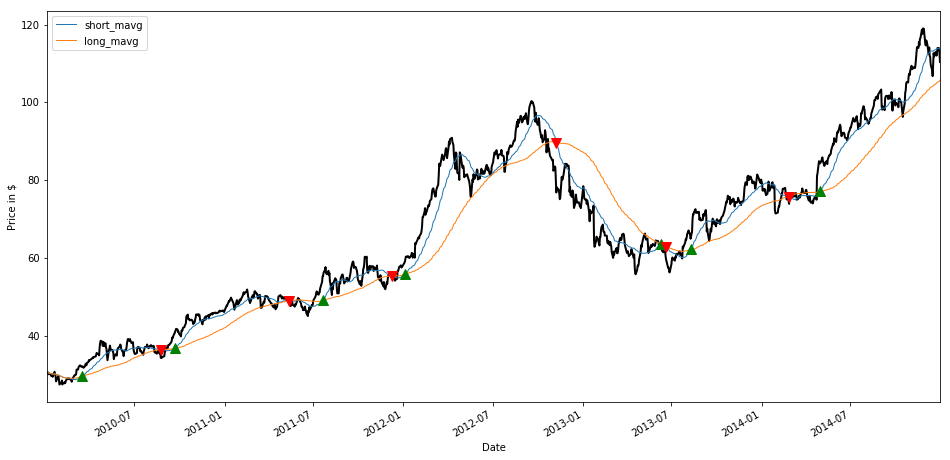

In [219]:
# graphe

# initialisation
fig = plt.figure(figsize = (16, 8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel = "Price in $")

# Plot the closing price
aapl_yahoo["Close"].plot(ax = ax1, color = "black", lw = 2.)

# Plot the short and long moving averages
signals[["short_mavg", "long_mavg"]].plot(ax = ax1, lw = 1.)

# Plot the buy signals when orders = 1.0
ax1.plot(signals.loc[signals.orders == 1.0].index, 
         signals.short_mavg[signals.orders == 1.0],
         "^", markersize = 10, color = "g")
         
# Plot the sell signals when orders = -1.0
ax1.plot(signals.loc[signals.orders == -1.0].index, 
         signals.short_mavg[signals.orders == -1.0],
         "v", markersize = 10, color = "r")
         
# Show the plot
plt.show()

In [220]:
# On crés les sous data frames formés des ordres d'achat et de vente et on les imprime
buy = signals[signals["orders"] == 1.0]
sell = signals[signals["orders"] == -1.0]
print(buy)
print(sell)

            signal  short_mavg  long_mavg  orders
Date                                             
2010-03-17     1.0   29.689571  29.613417     1.0
2010-09-22     1.0   36.761381  36.682829     1.0
2011-07-21     1.0   49.148000  49.052186     1.0
2012-01-05     1.0   55.870619  55.791814     1.0
2013-06-10     1.0   63.615048  63.536614     1.0
2013-08-09     1.0   62.249286  62.042214     1.0
2014-04-30     1.0   77.097191  77.031000     1.0
            signal  short_mavg  long_mavg  orders
Date                                             
2010-08-24     0.0   36.395953  36.407500    -1.0
2011-05-12     0.0   48.976809  48.979729    -1.0
2011-12-08     0.0   55.413714  55.452114    -1.0
2012-11-08     0.0   89.424571  89.869786    -1.0
2013-06-20     0.0   62.893667  62.924686    -1.0
2014-02-26     0.0   75.765428  75.877457    -1.0


<a id='backtesting'></a>
## Backtesting de la stratégie

In [334]:
# Le "backtesting" consiste à tester les perfromances de notre stratégie de trading sur des données historiques.
# Plus précisément:
# On suppose un capital initial de 100'000 €
# À chaque ordre d'achat, on achète 100 actitons Apple;
# à chaque ordre de vente, on vend 100 actitons Apple.
# On va déterminer si notre stratégie est bénéficiaire ou non.

# capital initial
initial_capital = float(100000.0)

# (a) On crée le data frame vide 'portfolio'
# ses lignes (index) sont les lignes de 'signals' (signals.index), donc les dates sucessives
# et il n'y a pas de colonnes a priori
portfolio = pd.DataFrame(index = signals.index)
#print(portfolio.head())

# (b) On rajoute une colonne 'orders' qui représente les ordres d'achat et de vente
portfolio["orders"] = signals["orders"]
#print(portfolio.head())
#print(portfolio.tail())
#print(portfolio[49:165])

# (c) On rajoute une colonne 'periods' qui représente les prériodes durant lesquelles on a acheté
# dès qu'on achète, la valeur passe à 1 et qu'on vend, la valeur repasse à 0
portfolio["periods"] = portfolio["orders"].cumsum()
#print(portfolio.head())
#print(portfolio.tail())
#print(portfolio[49:165])

# (d) On rajoute une colonne 'AAPL' qui représente la fluctuation des prix de clôture ajustés de l'action Apple
portfolio["AAPL"] = aapl_yahoo["Adj Close"]
#print(portfolio.head())
#print(portfolio.tail())

# (e) On crée une colonne 'shares held' qui représente le nombre d'actions détenues.
# À chaque ordre d'achat, on achète 100 actions Apple; 
# À chaque ordre de vente, on vend 100 actions Apple.
# Ainis, les actions sont détenues pendant les périodes d'achat.
portfolio["shares held"] = 100 * portfolio["periods"]
#print(portfolio.head())
#print(portfolio.tail())

# (f) On crée une colonne 'holdings' = 'shares held' * 'AAPL'
# qui représente la fluctuation de notre portefeuille (100 actions Apple) 
# durant les périodes d'achat uniquement (i.e., lorsque 'period' = 1)
portfolio["holdings"] = portfolio["shares held"] * portfolio["AAPL"] * portfolio["periods"]
#print(portfolio.head())
#print(portfolio.tail())
#print(portfolio[49:165])

# (g) On crée une colonne 'cash' qui représente l'argent détenu.
#portfolio["cash"] = 0.0 # create an empty column 'cash'
#portfolio.at[portfolio.index[0], "cash"] = initial_capital
# - Si on achète au temps t (i.e., order[t] = 1):
# cash[t] = cash[t-1] - holdings[t] = shares_held[t] * AAPL[t]
# - Pendant la période d'achat t, t+1, t+2, etc., on a cash[t+i] = cash[t] (on engrange rien)
# - Si on vend au temps t+k (i.e., order[t+k] = -1):
# cash[t+k] = cash[t+k-1] + holdings[t+k] = 100 * AAPL[t+k]
# - Pendant la période qui suit t, t+1, t+2, etc., on a cash[t+i] = cash[t] (on engrange rien)
# attention, syntaxe compliquée
portfolio["cash"] = initial_capital - \
    ( (portfolio["orders"] == 1.0) * portfolio["shares held"] * portfolio["AAPL"] ).cumsum() + \
    ( (portfolio["orders"] == -1.0) * portfolio["shares held"].shift(1) * portfolio["AAPL"] ).cumsum()
#print(portfolio.head())
#print(portfolio.tail())
#print(portfolio[49:165])


# (h) On crée une colonne 'total' = 'holdings' + 'cash'
portfolio["total"] = portfolio["holdings"] + portfolio["cash"]
#print(portfolio.head())
#print(portfolio.tail())
#print(portfolio[49:165])

# (i) On crée une colonne 'returns' qui représente le rendement
portfolio["returns"] = portfolio["total"].pct_change()
#print(portfolio.head())
#print(portfolio.tail())
print(portfolio[49:165])

            orders  periods       AAPL  shares held     holdings  \
Date                                                               
2010-03-16     0.0      0.0  27.982925          0.0     0.000000   
2010-03-17     1.0      1.0  27.941782        100.0  2794.178200   
2010-03-18     0.0      1.0  28.007864        100.0  2800.786400   
2010-03-19     0.0      1.0  27.708637        100.0  2770.863724   
2010-03-22     0.0      1.0  28.020332        100.0  2802.033234   
...            ...      ...        ...          ...          ...   
2010-08-23     0.0      1.0  30.644699        100.0  3064.469910   
2010-08-24    -1.0      0.0  29.912874          0.0     0.000000   
2010-08-25     0.0      0.0  30.281908          0.0     0.000000   
2010-08-26     0.0      0.0  29.956512          0.0     0.000000   
2010-08-27     0.0      0.0  30.123568          0.0     0.000000   

                     cash          total   returns  
Date                                                
2010-03-1

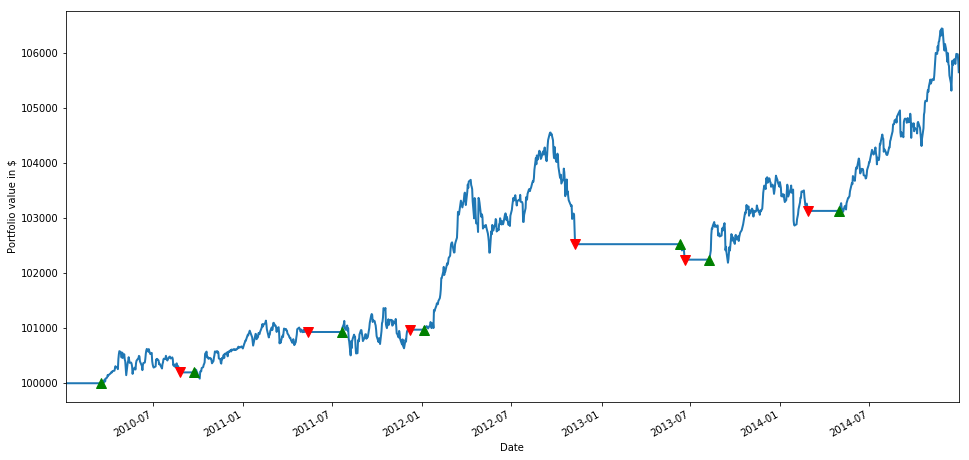

In [335]:
# graphe

fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(111, ylabel = "Portfolio value in $")

# courbe 'total'
portfolio["total"].plot(ax = ax1, lw = 2.)

# Plot the "buy" orders
ax1.plot(portfolio.loc[portfolio.orders == 1.0].index, 
         portfolio.total[portfolio.orders == 1.0],
         '^', markersize = 10, color = "g")

# Plot the "sell" orders
ax1.plot(portfolio.loc[portfolio.orders == -1.0].index, 
         portfolio.total[portfolio.orders == -1.0],
         'v', markersize = 10, color = "r")

# Show the plot
plt.show()

<a id='evaluation'></a>
## Évaluation de la stratégie

<a id='Sharpe'></a>
### Sharpe Ratio

In [336]:
# On sélectionne la colonne 'returns' de notre 'portfolio'
returns = portfolio["returns"]

# on calcul le 'annualized Sharpe ratio'
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio)

0.8539672822995072


<a id='Maximum_Drawdown'></a>
### Maximum Drawdown

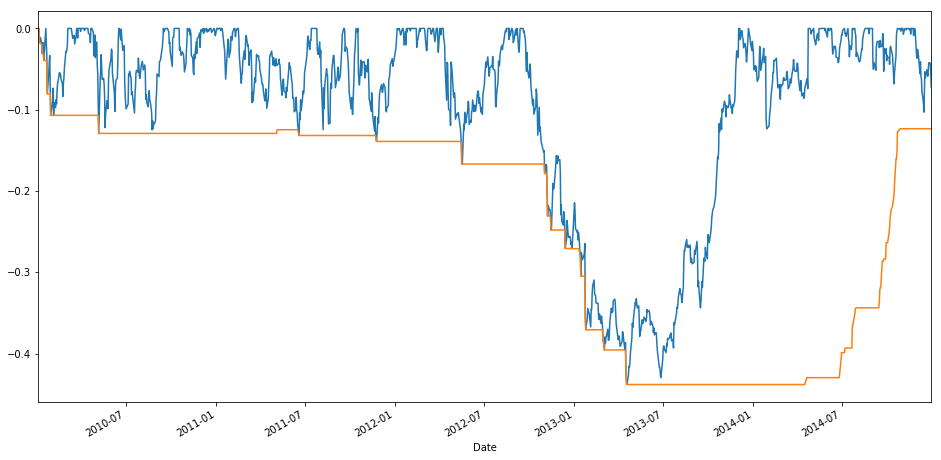

In [340]:
# fenêtre de 252 jours
window = 252

# On alcul le 'max drawdown' relatif aux 252 jours passés
rolling_max = portfolio["AAPL"].rolling(window, min_periods = 1).max()
daily_drawdown = portfolio["AAPL"] / rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
plt.figure(figsize = (16, 8))

daily_drawdown.plot()
max_daily_drawdown.plot()

plt.show()

<a id='CAGR'></a>
### Compound Annual Growth Rate (CAGR)

In [343]:
# nombres de jours dans 'portfolio'
days = (portfolio.index[-1] - portfolio.index[0]).days

# Calcul du CAGR 
cagr = ((((portfolio["AAPL"][-1]) / portfolio["AAPL"][1])) ** (365.0/days)) - 1
print(cagr)

0.30702499490179114
